In [16]:
# loading required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# importing data from google drive
penguins_data = pd.read_csv('/content/drive/MyDrive/ML datasets/penguins.csv')

In [18]:
# dataset shape and structure
print(penguins_data.shape)

penguins_data.info()


(344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [19]:
# checking for any missing values
penguins_data.isna().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


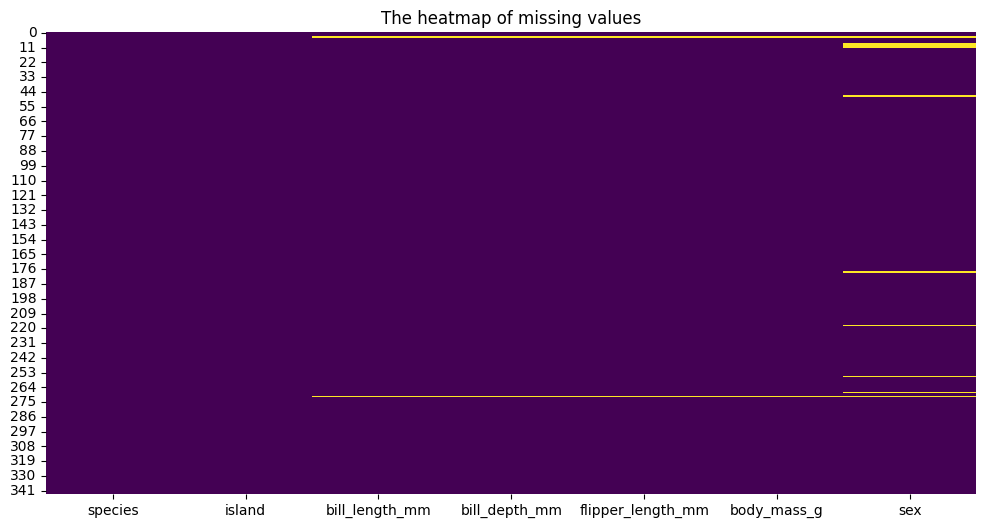

In [20]:
plt.figure(figsize=(12, 6))
sns.heatmap(penguins_data.isna(), cbar = False, cmap = 'viridis')
plt.title('The heatmap of missing values')
plt.show()

It appears that there exists missing values in the dataset that should be addressed before modeling.

In [21]:
# removing rows with missing values
penguins_data = penguins_data.dropna()

### target variable distribution

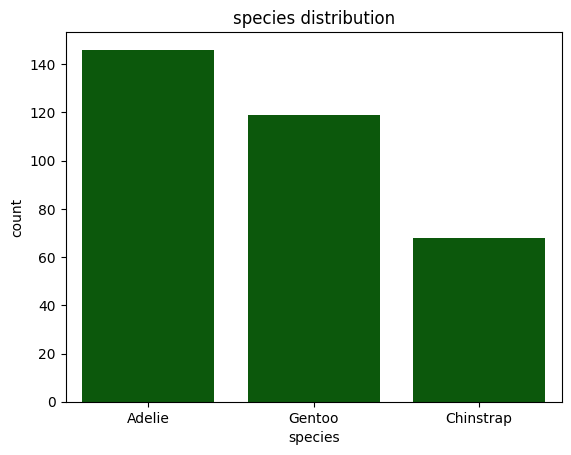

In [22]:
# creating the dataframe
species_counts = pd.DataFrame(penguins_data.value_counts('species'))

# creating the barplot
sns.barplot(data = species_counts, x = 'species', y = 'count', color = 'darkgreen')
plt.title('species distribution')
plt.show()

Compared to Adelie and Gentoo class sizes, Chinstrap class size is relatively small.

### Categorical feature distributions

#### island

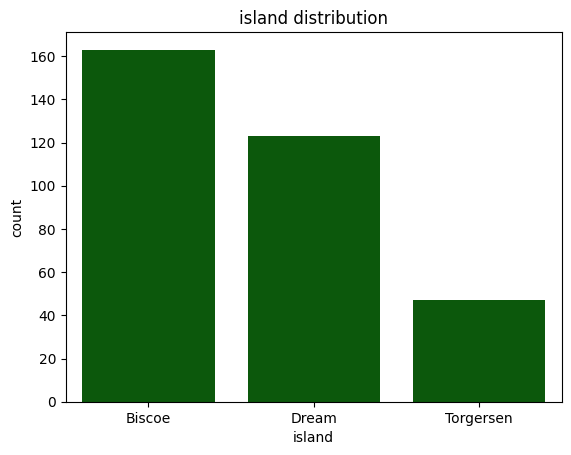

In [23]:
# creating the dataframe
island_counts = pd.DataFrame(penguins_data.value_counts('island'))

# creating the plot
sns.barplot(data = island_counts, x = 'island', y = 'count', color = 'darkgreen')
plt.title('island distribution')
plt.show()

The number of penguins per island is uneven, with Biscoe having the most samples, Dream a moderate number, and Torgersen the fewest.

#### sex

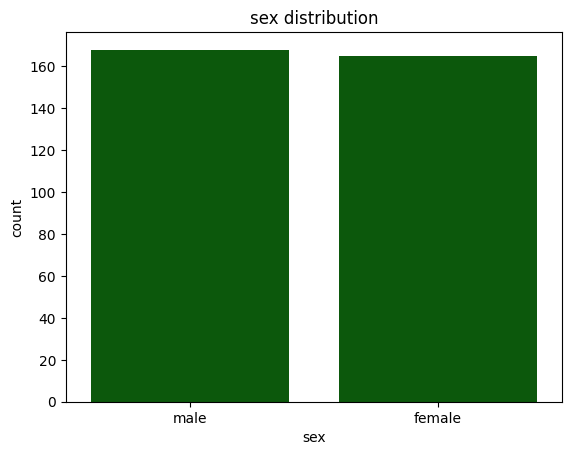

In [24]:
# creating the dataframe
sex_counts = pd.DataFrame(penguins_data.value_counts('sex'))

# creating the plot
sns.barplot(data = sex_counts, x = 'sex', y = 'count', color = 'darkgreen')
plt.title('sex distribution')
plt.show()

The number of male and female penguins are almost same.

### Numerical feature distributions

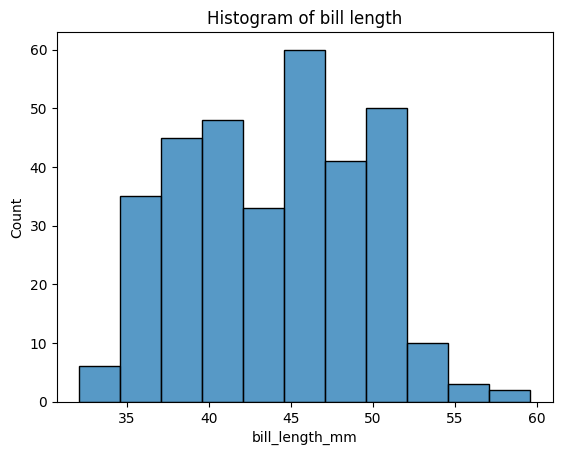

In [25]:
sns.histplot(data = penguins_data, x = 'bill_length_mm')
plt.title('Histogram of bill length')
plt.show()

The distribution of bill length is symmetrically distributed.

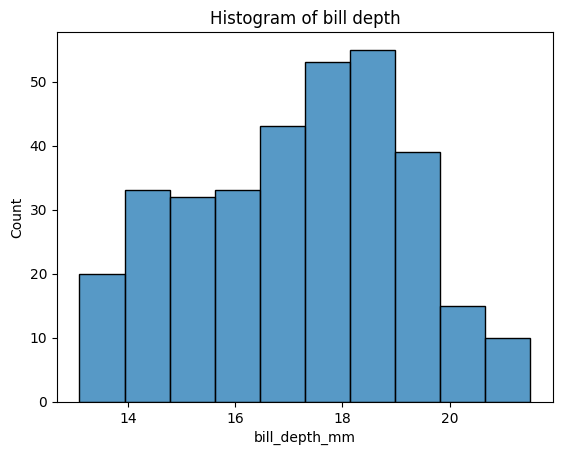

In [26]:
sns.histplot(data = penguins_data, x = 'bill_depth_mm')
plt.title('Histogram of bill depth')
plt.show()

The distribution of bill depth is concentrated around a central range with some variability.

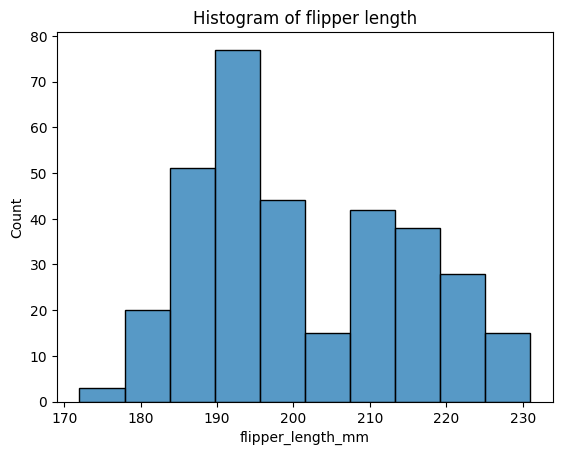

In [27]:
sns.histplot(data = penguins_data, x = 'flipper_length_mm')
plt.title('Histogram of flipper length')
plt.show()

The distribution of flipper length shows a wide range of values, indicating substantial variability.

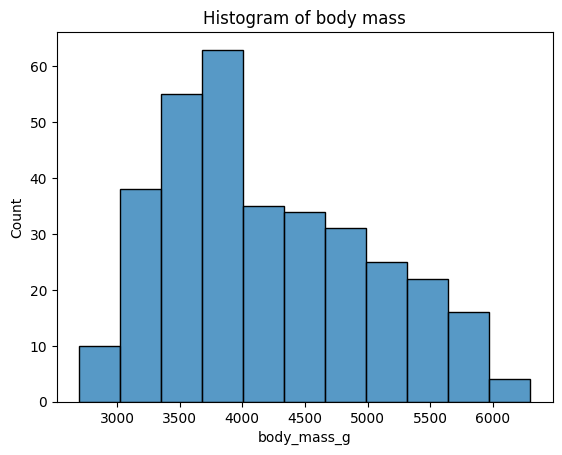

In [28]:
sns.histplot(data = penguins_data, x = 'body_mass_g')
plt.title('Histogram of body mass')
plt.show()

The distribution of body mass appears slightly right skewed, with most observations clustered in the mid range.

### Bivariate analysis

#### Numerical features with respect to island

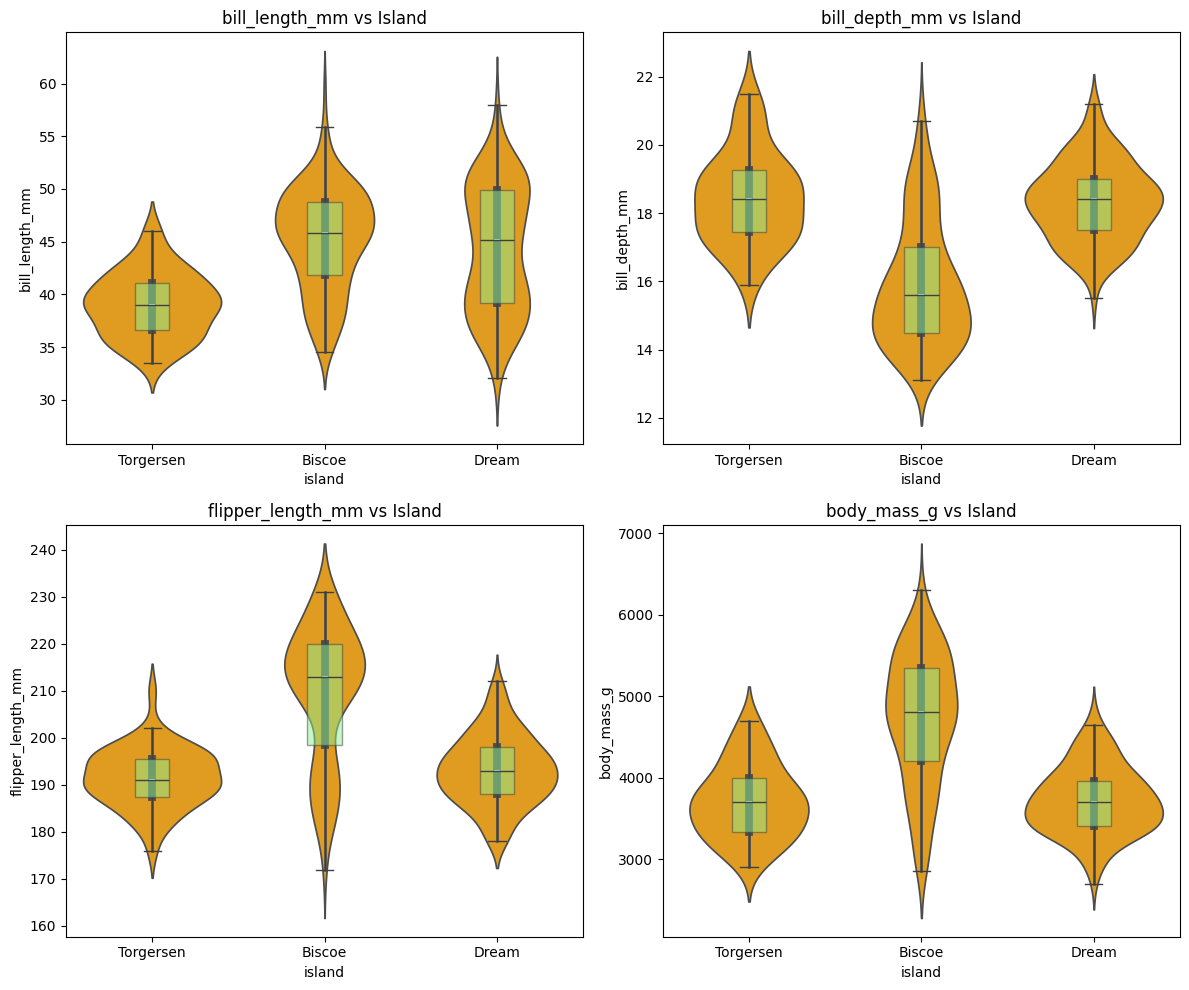

In [36]:
# defining the list of features
num_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Flatten 2x2 grid for easy indexing

for i, feature in enumerate(num_features):
    sns.violinplot(data=penguins_data, x='island', y = feature, ax = axes[i], color = 'orange')
    sns.boxplot(data = penguins_data, x = 'island', y = feature, ax = axes[i],
        boxprops={'facecolor':'lightgreen', 'alpha':0.5}, showfliers=False, width=0.2)

    axes[i].set_title(f'{feature} vs Island')

plt.tight_layout()
plt.show()

#### Numerical features with respect to Sex

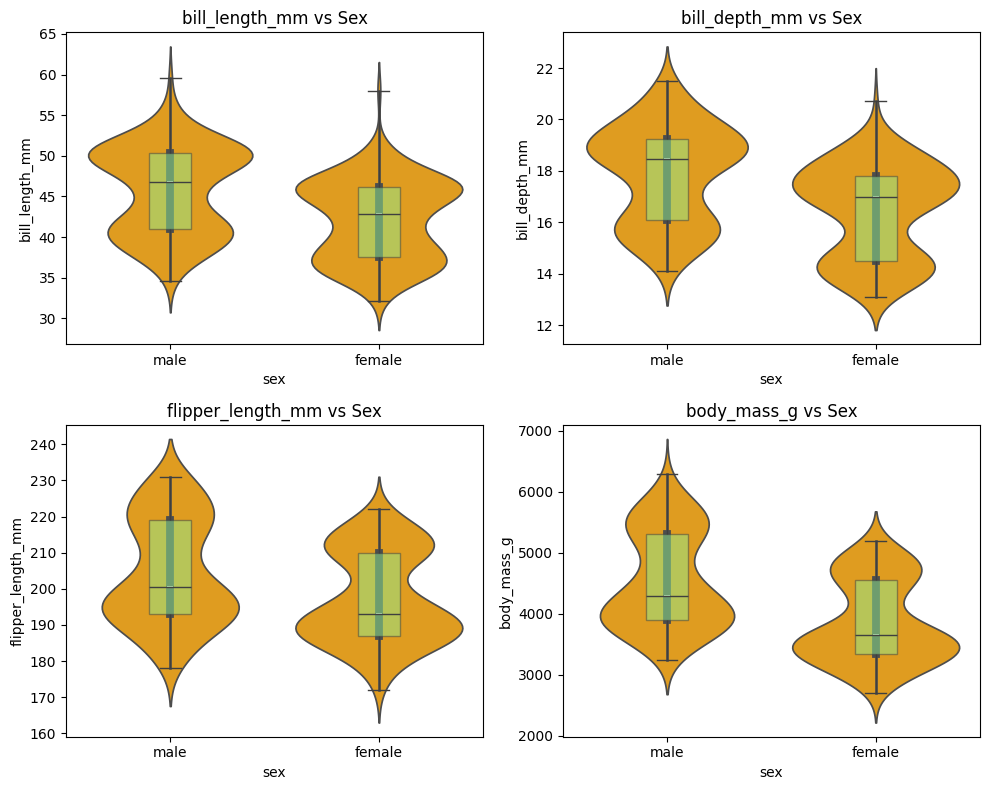

In [39]:
# defining the list of features
num_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.violinplot(data=penguins_data, x='sex', y = feature, ax = axes[i], color = 'orange')
    sns.boxplot(data = penguins_data, x = 'sex', y = feature, ax = axes[i],
        boxprops={'facecolor':'lightgreen', 'alpha':0.5}, showfliers=False, width=0.2)

    axes[i].set_title(f'{feature} vs Sex')

plt.tight_layout()
plt.show()

#### Heatmap

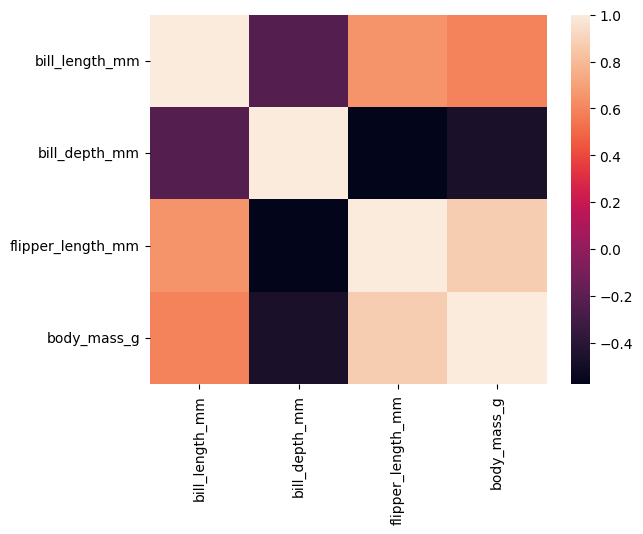

In [43]:
corr_matrix = penguins_data.drop(columns = ['species', 'island', 'sex'], axis = 1).corr()
sns.heatmap(corr_matrix)
plt.show()

The correlation matrix shows that flipper length and body mass have a strong positive correlation, indicating that penguins with longer flippers tend to be heavier. Bill length is moderately positively correlated with flipper length and body mass, while bill depth shows moderate negative correlations with flipper length and body mass. Bill length and bill depth are weakly negatively correlated, suggesting almost no linear relationship between them.

#### Pairplot

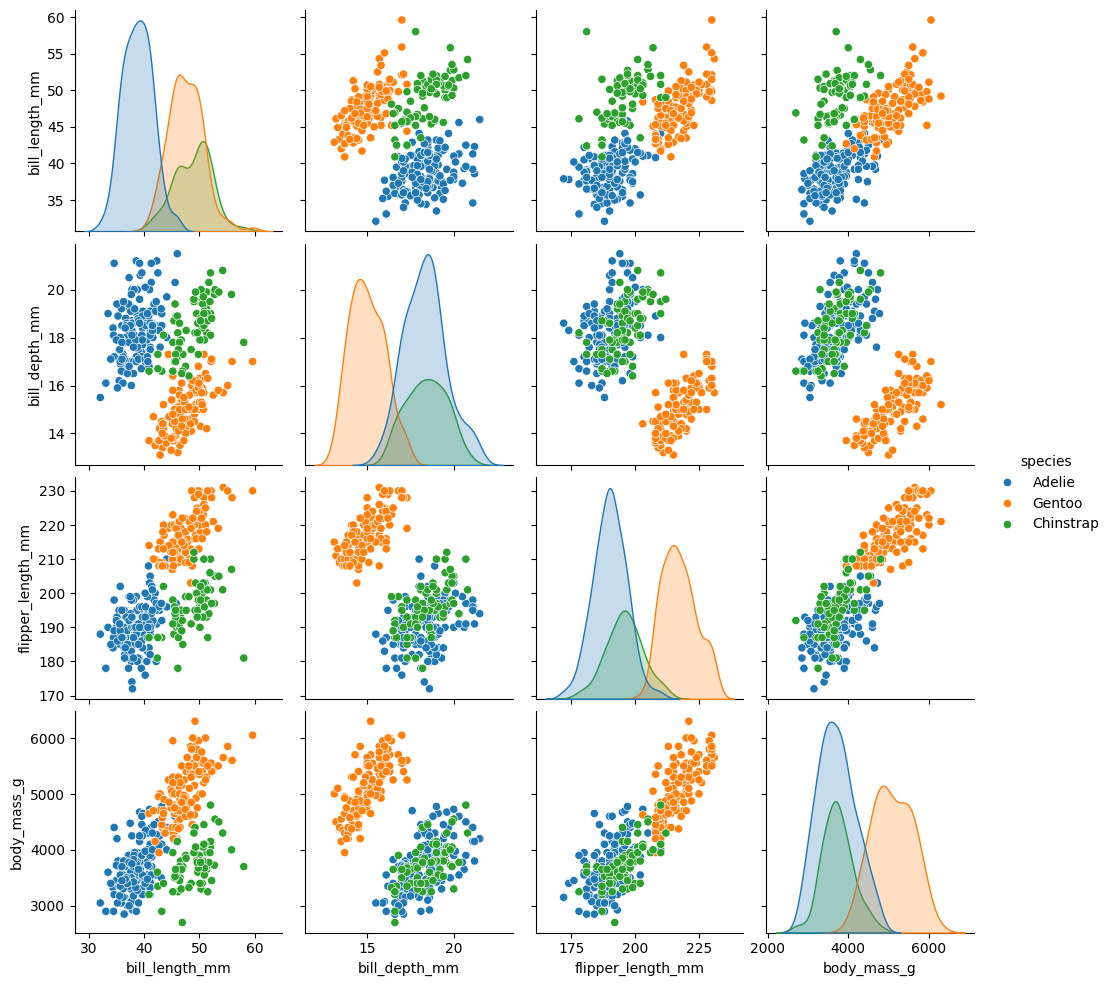

In [49]:
sns.pairplot(data = penguins_data, diag_kind = 'kde', hue = 'species')
plt.show()

In most of the scatterplots in above pairplot, the Species Gentoo is visually seperated from other species. Other two species, Adeile and Chinstrap are grouped in most of the scatterplots.